# Scikit-learn basics

Now that we have get to known with Pycaret classification and general workflow let's see how the same things can be done with other tools, more precisely with Scikit-learn. Where Pycaret was very straightforward and easy to learn, it doesn't really show what is really going on when it's running all the different algorithms and creating different models. Here we introduce a more traditional machine learning workflow.

__[*scikit-learn*](https://en.wikipedia.org/wiki/Scikit-learn)__ is the premier free software machine learning library for the Python programming language and is built on top of [SciPy](https://scipy.org) (and [NumPy](https://www.numpy.org)). <br>
The scikit-learn library is accompanied with an **extremely comprehensive and well written [documentation](https://scikit-learn.org/stable/documentation.html)** including [User Guide](https://scikit-learn.org/stable/user_guide.html), [Tutorials](https://scikit-learn.org/stable/tutorial/index.html), [Glossary](https://scikit-learn.org/stable/glossary.html), and a lot of [Examples](https://scikit-learn.org/stable/auto_examples/index.html).



## Import libraries

In [1]:
#visualization
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np

## Load the data

In [2]:
# this is the same data we used in pycaret classification notebook
df = pd.read_csv('./data/heart_disease.csv', index_col=0)

In [3]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral_in_mg/dl,fasting_blood_sugar_>_120_mg/dl,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_of_peak,number_of_major_vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


So as a reminder, we try to predict the target column `Disease` where 0 = no disease and 1 = disease

---

# K-Nearest neighbors

Let's take a closer look what we did in Pycaret-notebook when we created a knn-model.</br></br>

Consider you have gathered a bunch of blood samples from a two subtypes of diabetics C1 and C2. Each sample contains the concentrations of various serum proteins, and will be used to . Now imagine you had been uncareful and lost which class some sample s belonged to. Before your boss finds out your mistake, how can you best retrieve the correct class label? (Note: this example is purely theoretical).

We proceed by using the general framework of viewing features as numbers along a dimension in hyperspace. For the sake of simplicity, let's only consider two features. Color the healthy samples red and the sick samples blue. How would you decide the correct class of the unkown sample s? Plotting s with the other points should provide a clue.

<img src="assets/knn_example.png" style="width:30%" />

Making a scatter plot provides a strong clue: the unknown point is closer to the red points, so it is reasonable to assume it also should be red. Framed more precisely we can count the k closest neighbors of s, then we let the majority vote decide the true label of s. For instance, looking at the single closest neighbor of s, we would decide upon s belonging to the red group. If we count the 3 nearest neighbors, 2 of them are red. Counting the 5 nearest yields 3 red and 2 blue. In any case, the prediction is the same. But we aren't always so lucky. Here we have alluded to a problem you are guaranteed to face: how many neighbors should you choose? There is not really an optimal value for k, but in general a smaller is more likely to overfit, while a too large value is likely to underfit.

<img src="assets/knn_example_2.png" style="width:30%"/>

<br>

## [Train-test-split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Pycaret did the train-test-split for us but normally you need to do it yourself. We use scikit-learn's `train_test_split()`

**75% for training and 25% for testing (by default)** 

In [4]:
#split data to target and explanatory variables
data = df.loc[:, df.columns != 'Disease']
target = df['Disease']

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42) #75/25 split by default

In [5]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (202, 13)
y_train shape: (202,)
X_test shape: (68, 13)
y_test shape: (68,)


## The Scikit-learn workflow:
- instantiate model (define the model type, and hyperparameters)
- train the model (using `.fit`)
- predict using the trained model

In [6]:
# instantiate knn-model
knn = KNeighborsClassifier()

In [7]:
# train the model using train sets
knn.fit(X_train, y_train)

KNeighborsClassifier()

Just like that the model is trained, in two lines of code. Now you are left with a trained algorithm `knn`, which you can use to predict the group belonging of new samples.  

In [8]:
# use the trained model to get predictions of test-set samples
knn.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

<div class='alert alert-warning'>
<h4>Exercise 1. </h4>Test your models performance on the test set by calling the `knn.score` method. Now what happens when you test it on the training set? Why are the two different?

In [ ]:
#Ex1


In [3]:
#%load solutions/skl_knn_1.py

Overwriting solutions/skl_knn_1.py


To get the other metrics you can use comprehensive `classification_report` to compare y_test and predictions:

In [9]:
# Parameters:
# y_true = true labels
# y_pred = predicted labels
# target_names = optional, target labels in order [0, 1]

print(classification_report(y_test, knn.predict(X_test), target_names=['no_disease', 'disease'])) 

              precision    recall  f1-score   support

  no_disease       0.72      0.70      0.71        40
     disease       0.59      0.61      0.60        28

    accuracy                           0.66        68
   macro avg       0.65      0.65      0.65        68
weighted avg       0.66      0.66      0.66        68



## Feature scaling

So far we have done minimal preprocessing. But if you remember, we **normalized** and **transformed** the data in Pycaret-notebook (using setup() parameters). With few exceptions, you should always do some basic preprocessing, like standardizing each input feature to zero mean and unit variance. In fact, you should **never** do KNN without standardizing the input first. `sklearn` has a great functionality, and offers a vast number of options for preproccesing in the `preprocessing` sub module.

In addition to the `fit` method, many `sklearn` objects have a `transform` method, which lets you transform your dataset. In this case, the transform yields the dataset post normalization. 

<img src="assets/knn_unnormalized.png" style="width:35%"/>

In [10]:
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

In [11]:
# We can scale the data the same way we used knn-model. Here we fit only the training set
scaler.fit(X_train) 
X_scaled = scaler.transform(data) # transform the data (that is the dataframe without target column)

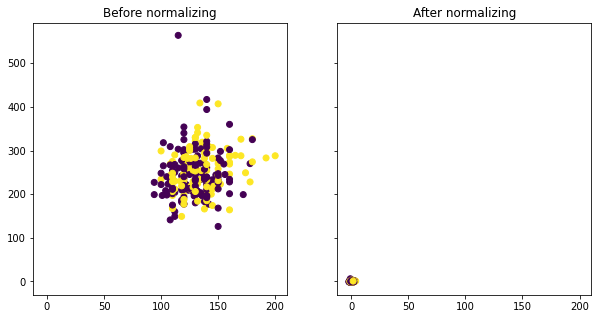

In [12]:
# Plot data before and after normalizing
fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True) # make two plots on the same row
ax[0].scatter(data.iloc[:,3], data.iloc[:,4], c=target) # scatter resting blood pressure and serum cholesterol
ax[0].set_title('Before normalizing') # set the title of the first subplot
ax[1].scatter(X_scaled[:,3], X_scaled[:,4], c=target) 
ax[1].set_title('After normalizing') # set the title of the second subplot
plt.show()

In [13]:
# transform both train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Let's see how well our model performs now after scaling

In [14]:
print("Train: ", knn.score(X_train_scaled, y_train))
print("Test: ", knn.score(X_test_scaled, y_test))

Test:  0.8235294117647058
Train:  0.8663366336633663


Without scaling we got ~0.7 accuracy so the performance improved significantly.

<div class='alert alert-warning'>
<h4>Exercise 2. </h4> Predict class labels using the trained model. Save labels in variable 'pred'

In [ ]:
# Ex2


In [17]:
# %load solutions/skl_knn_2.py

### Confusion matrix

We can use sklearn confusion_matrix module and seaborn heatmap to visualize classification results clearly in one plot.

In [18]:
from sklearn.metrics import confusion_matrix

# make a confusion matrix
cf_matrix = confusion_matrix(y_test.values, pred)

<AxesSubplot:>

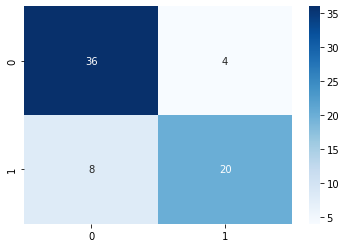

In [19]:
# plot confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues')